In [3]:
#EDA-EXPLORATORAY DATA ANALYSIS
#STEP 1 IMPORT DATA
#PIP INSTALL PANDAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('housing_price.csv')

In [3]:
#EDA-EXPLORATORAY DATA ANALYSIS
#STEP 1 IMPORT DATA
#PIP INSTALL PANDAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('housing_price.csv')

In [5]:
#DATA STRUCTURE
print ('data has {} no of rows and {} no of columns'. format(data.shape[0],data.shape[1]))
print (data.columns)

data has 1460 no of rows and 81 no of columns
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 

In [12]:
#STEP 3: CHECKING NULL VALUES IN DATA
null_col=[x for x in data.columns if data[x].isnull().sum()>0]
if len(null_col)==0:
    print('data is in clean form')
else:
    drop_col=[x for x in data.columns if data[x].isnull().mean()>0.1]
    if len(null_col)==0:
        print('none of the columns to be dropped from data')
    else:
        data=data.drop(drop_col,axis=1)
        print('we have dropped {} no of columns from data \n and they are: {}'.format(len(drop_col),drop_col))
    new_null_col=[x for x in null_col if x not in drop_col]
    null_text=[x for x in new_null_col if data[x].dtype=='object']
    null_num=[x for x in new_null_col if data[x].dtype!='object']
    if len(null_col)==0:
        for x in null_num:
            median=data[x].median()
            data[x]=data[x].fillna(median)
    if len(null_text)==0:
        for x in null_text:
            mode=max(dict(data.groupby(x)[x].count()))
            data[x]=data[x].fillna(mode)
    print('now data is in clean form')

we have dropped 0 no of columns from data 
 and they are: []
now data is in clean form


In [14]:
# STEP:04 SPLIT DATA
text_col=[x for x in data.columns if data[x].dtype=='object']
conti_col=[x for x in data.columns if data[x].dtype!='object' and len(data[x].unique())>20]
disc_col=[x for x in data.columns if data[x].dtype!='object' and len(data[x].unique())<=20]
print(len(conti_col))
print(len(disc_col))
print(len(text_col))
print(data.shape[1])

21
16
37
74


lef skew-->['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
right skew--->
no skew--->['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']

lepto kurtic--->['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']
meso kurtic---->['WoodDeckSF']
plati--kurtic--->['Id', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', '2ndFlrSF', 'GarageYrBlt', 'GarageArea']

column with outlier--->['LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']
           Id   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
count  1460.0  

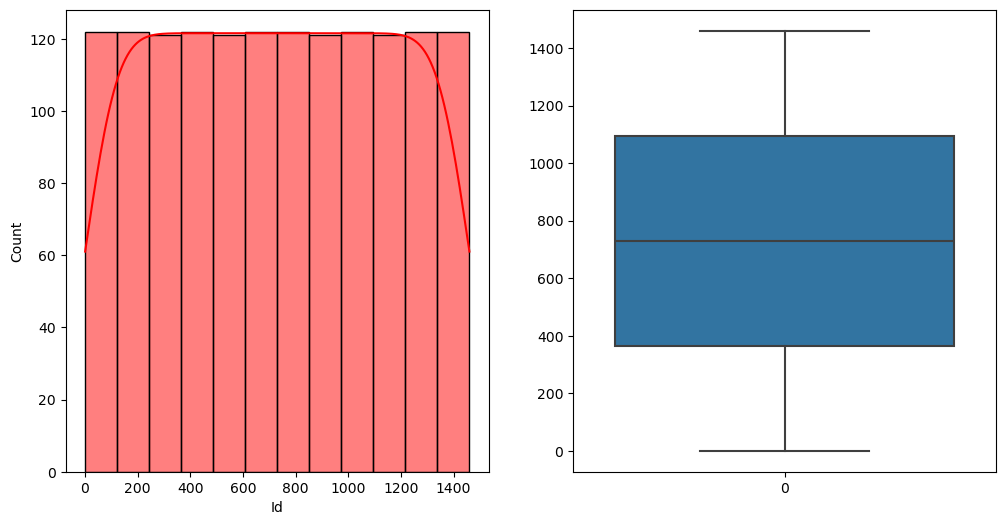

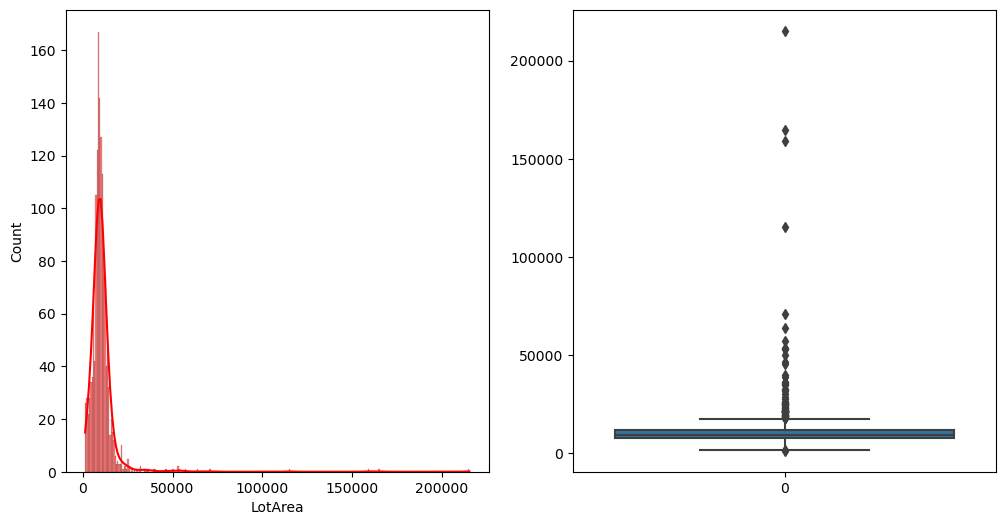

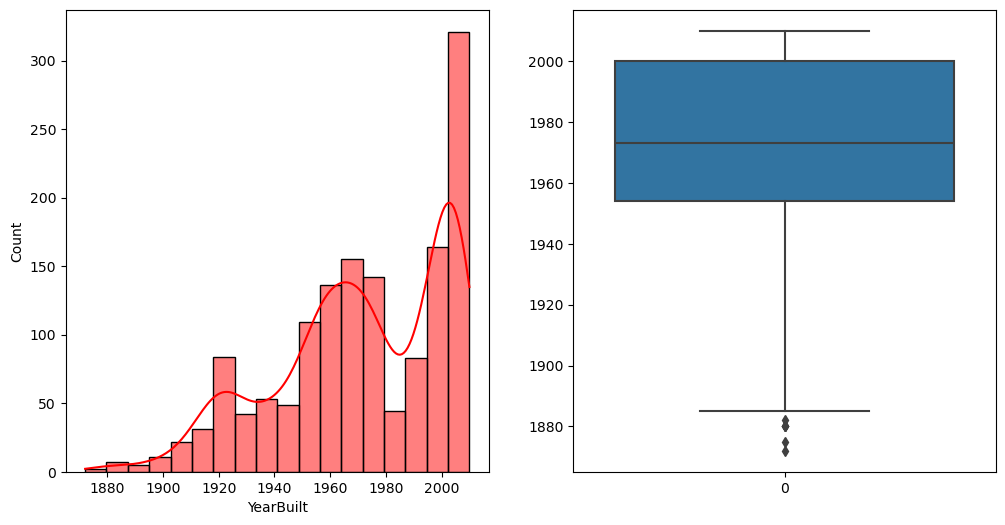

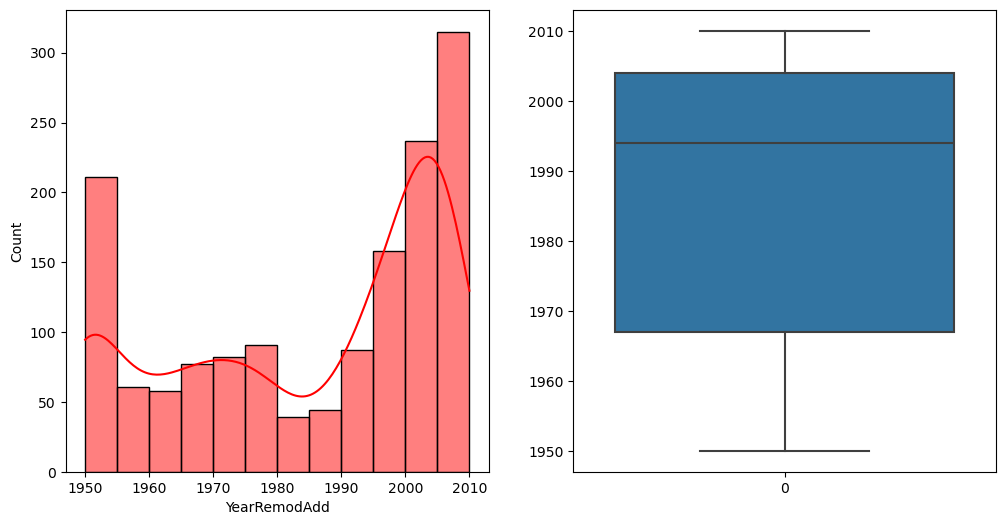

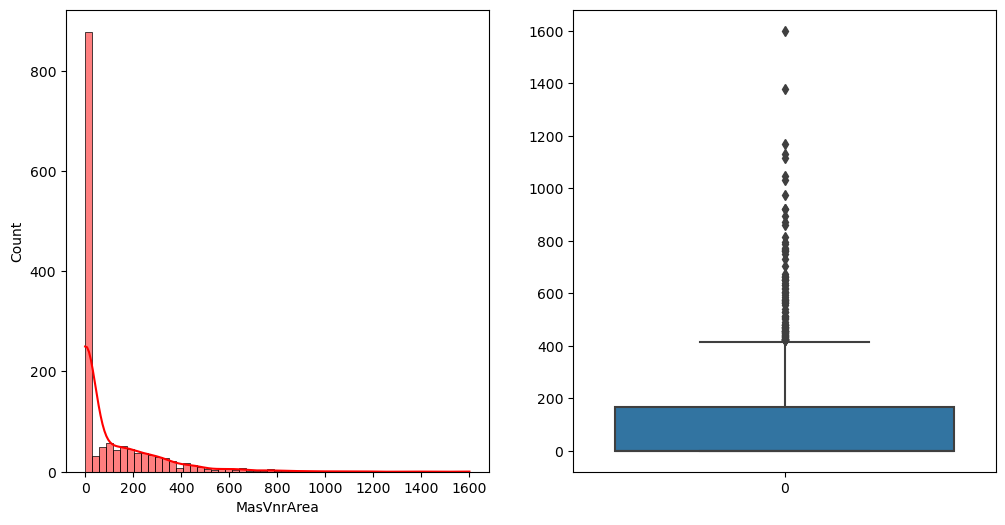

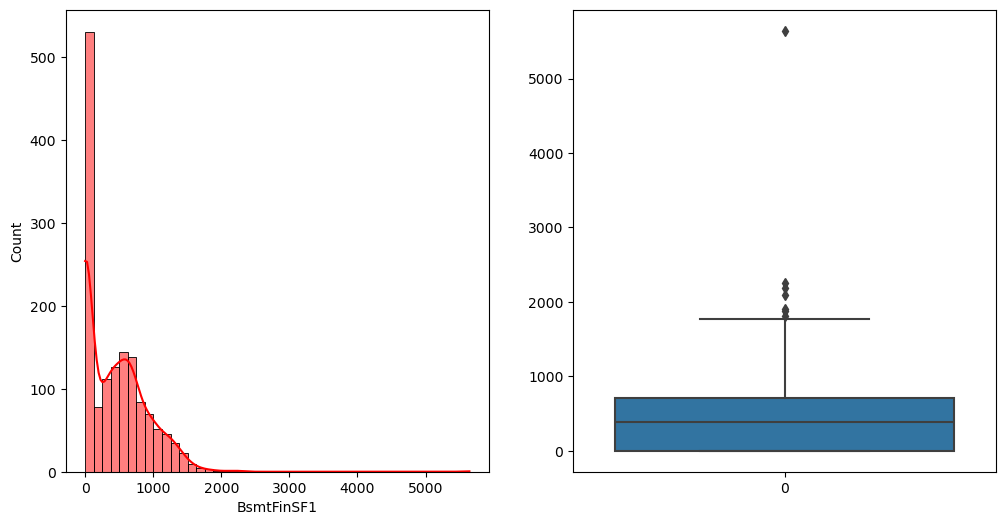

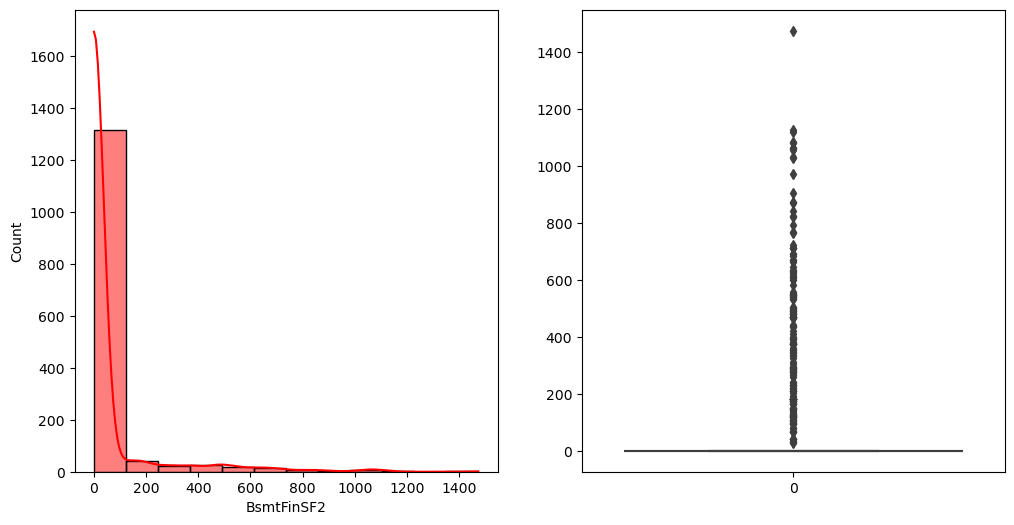

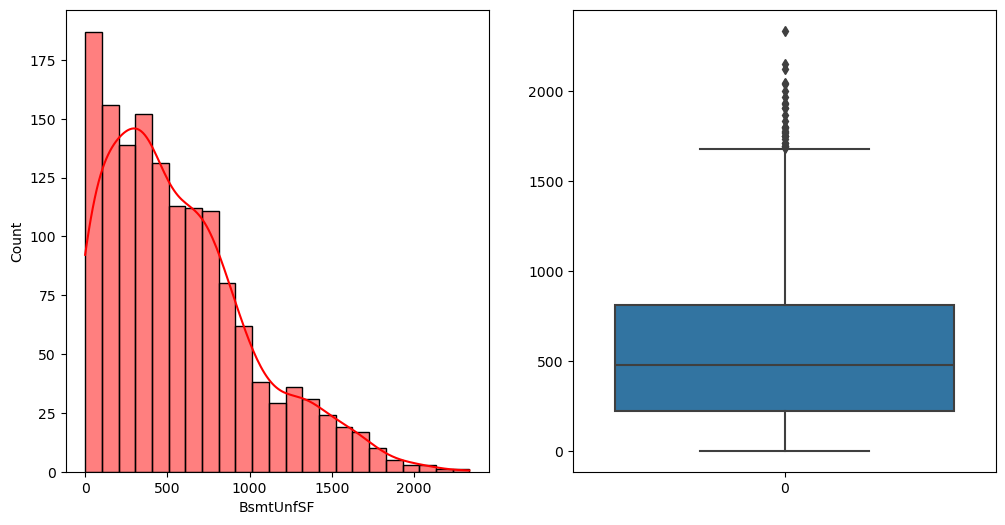

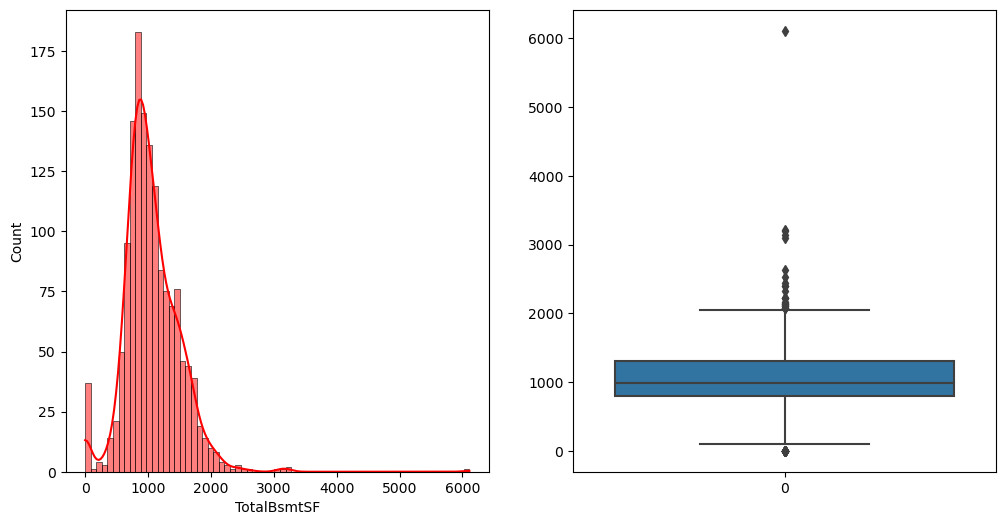

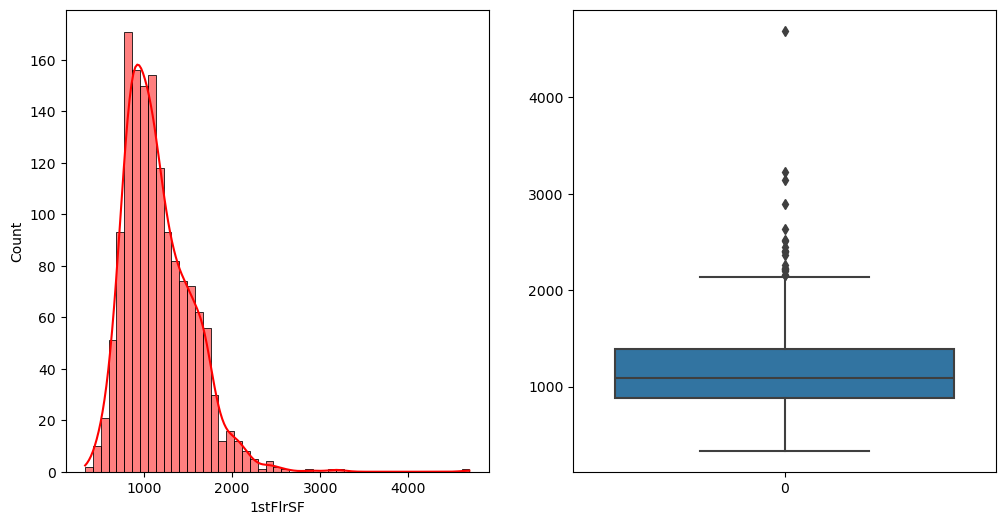

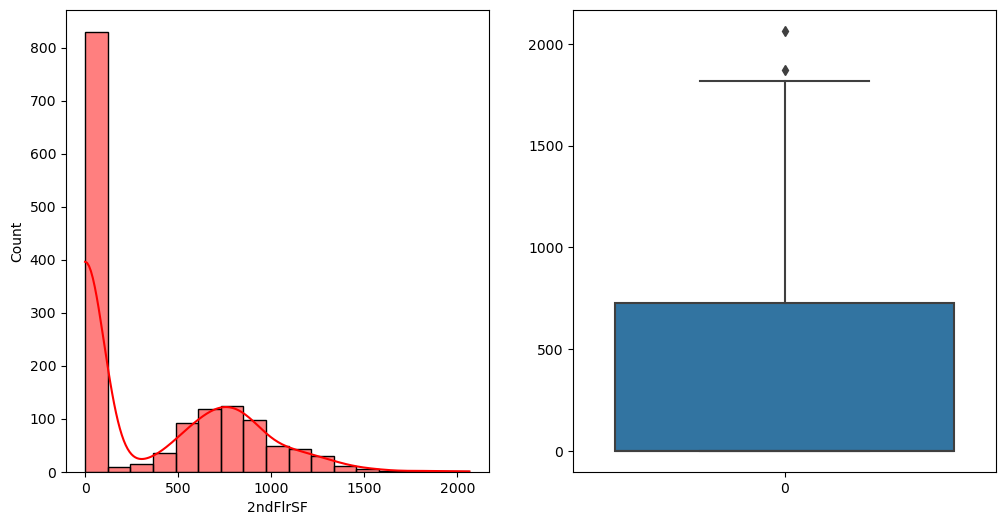

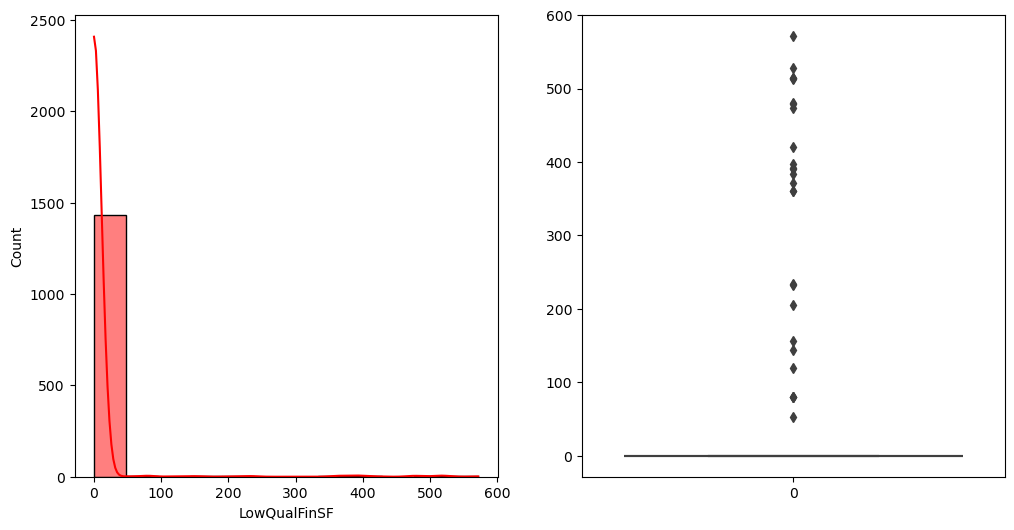

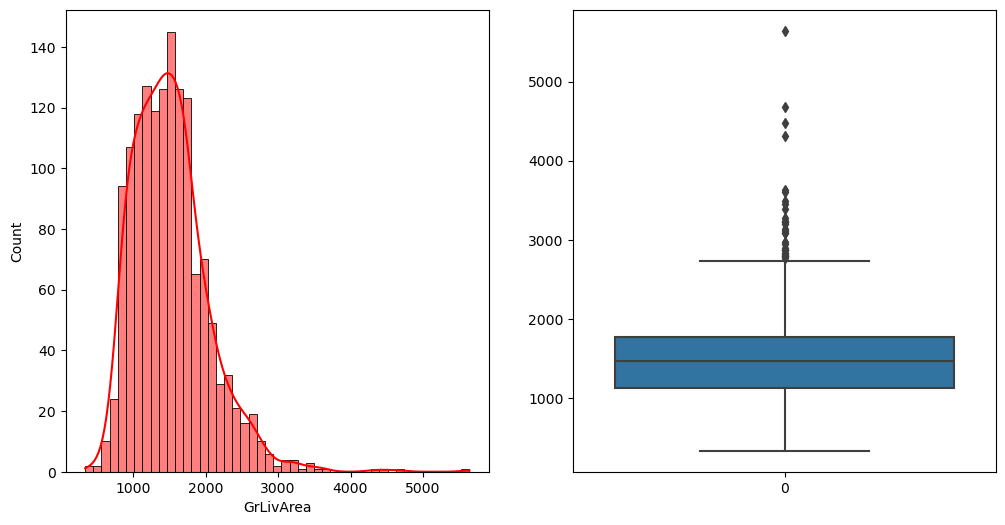

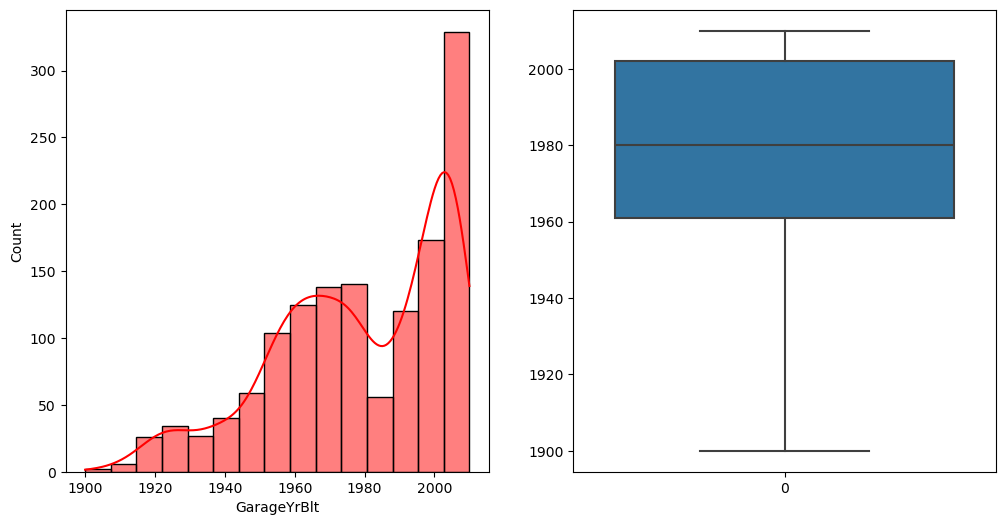

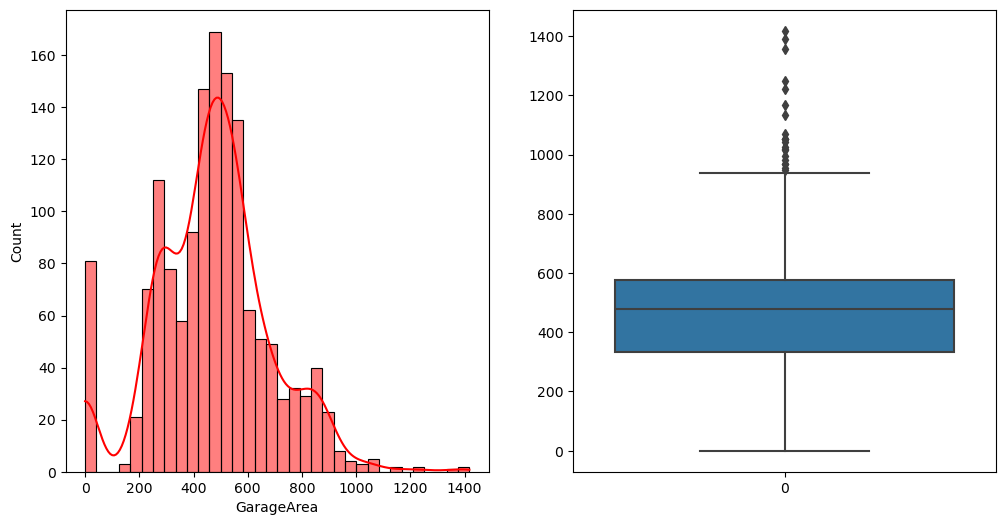

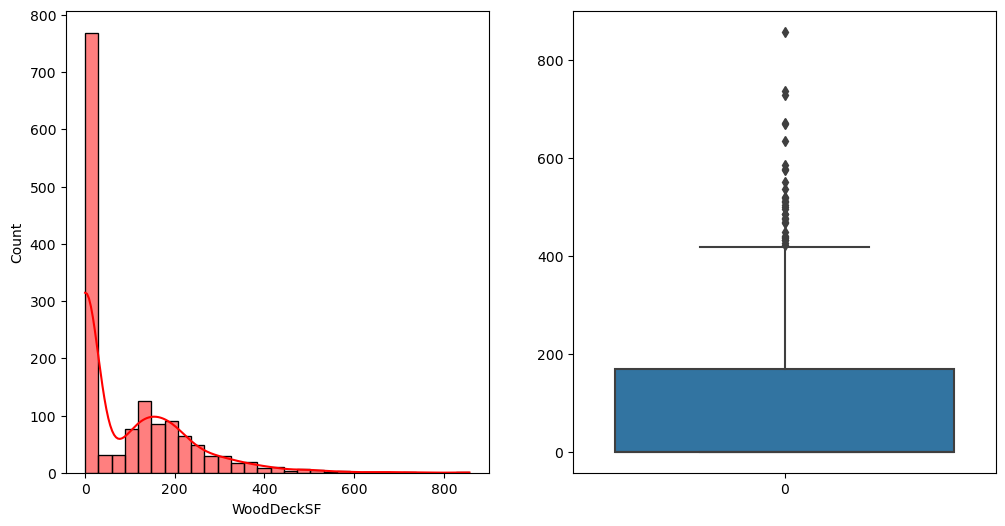

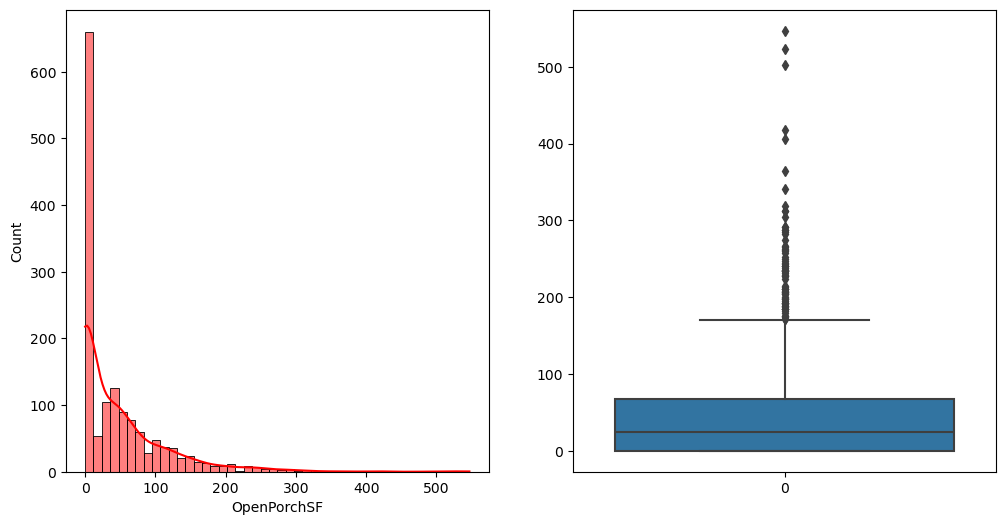

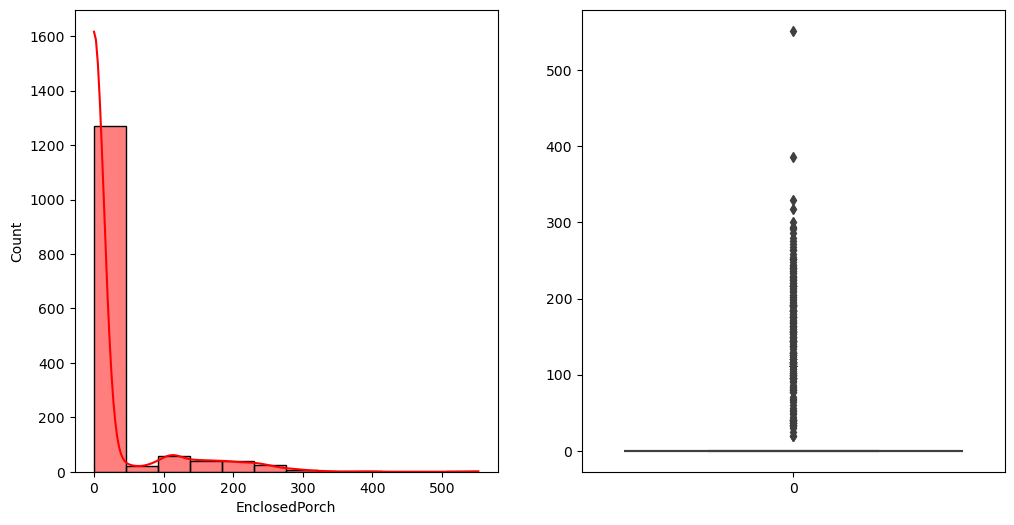

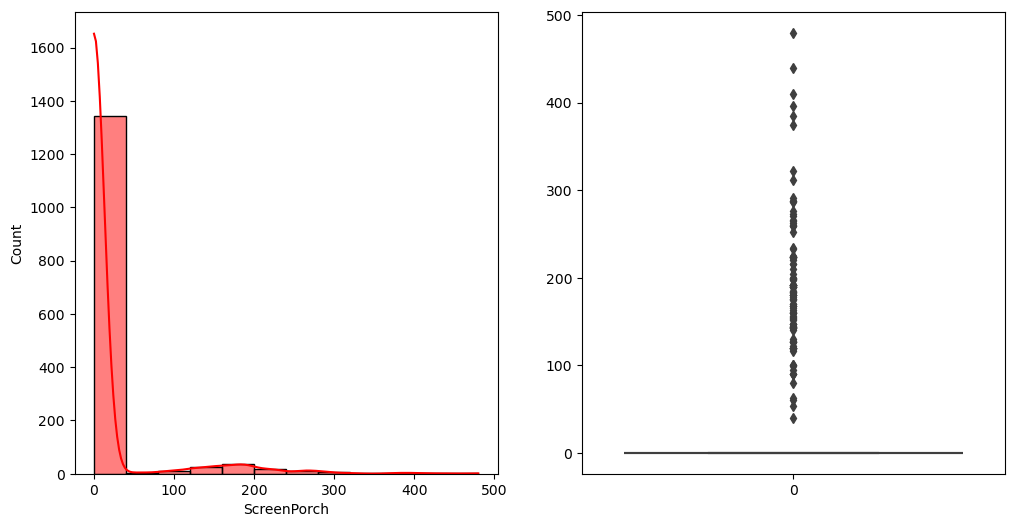

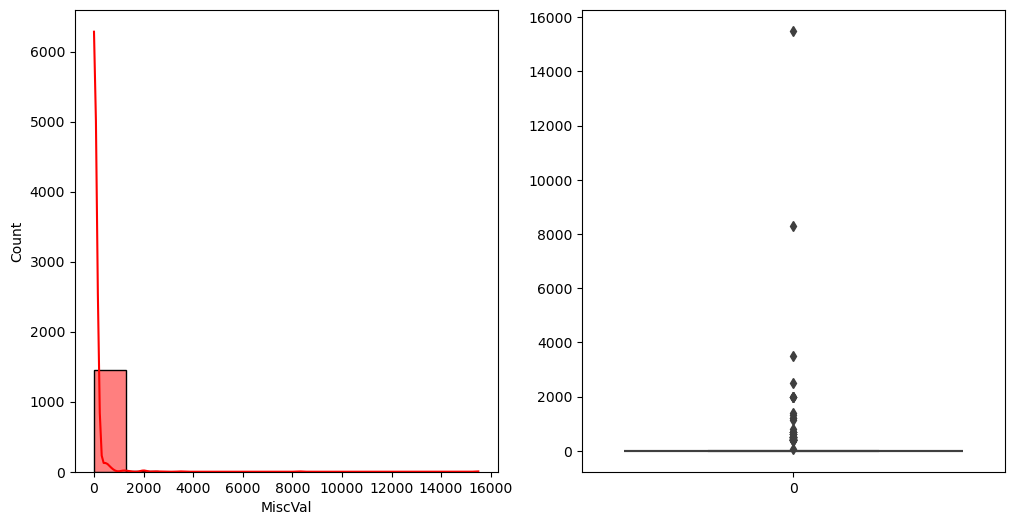

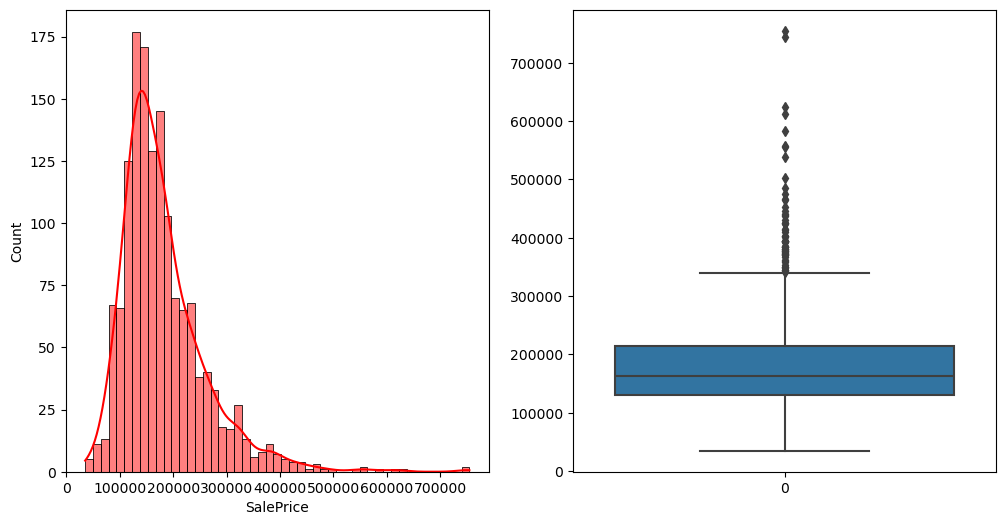

In [23]:
# STEP:05 CONTINOUS COLUMN ANALYSIS
#1. SKEWNESS IN DATA

left_skew=[x for x in conti_col if data[x].skew().round(0)<0]
right_skew=[x for x in conti_col if data[x].skew().round(0)>0]
no_skew=[x for x in conti_col if data[x].skew().round(0)==0]
print('lef skew-->{}\nright skew--->\nno skew--->{}'.format(left_skew,right_skew,no_skew))

#2. KURTOSIS IN DATA

lepto=[x for x in conti_col if data[x].kurt().round(0)>3]
meso=[x for x in conti_col if data[x].kurt().round(0)==3]
plati=[x for x in conti_col if data[x].kurt().round(0)<3]
print('\nlepto kurtic--->{}\nmeso kurtic---->{}\nplati--kurtic--->{}'.format(lepto,meso,plati))

#3. OUTLIER ANALYSIS
outlier=[]
for x in conti_col:
    q1=data[x].quantile(0.25)
    q3=data[x].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.3*iqr
    lb=q1-1.5*iqr
    mx=data[x].max()
    mn=data[x].min()
    if mn<lb or mx>ub:
        outlier.append(x)
print('\ncolumn with outlier--->{}'.format(outlier))

#STEP 4: DESCRIPTIVE STATS

stats=data[conti_col].describe().round(0)
print(stats)

#STEP 5: PLOTTING- HISTOGRAM, BOX PLOT

import warnings
for x in conti_col:
    warnings.filterwarnings('ignore')
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(data[x],kde=True,color='red')
    plt.subplot(1,2,2)
    sns.boxplot(data[x])
    plt.show()
    

In [25]:
for x in right_skew:
    v=data[x].skew().round(0)
    print('column {} has skewnes of{}'.format(x,v))

column LotArea has skewnes of12.0
column MasVnrArea has skewnes of3.0
column BsmtFinSF1 has skewnes of2.0
column BsmtFinSF2 has skewnes of4.0
column BsmtUnfSF has skewnes of1.0
column TotalBsmtSF has skewnes of2.0
column 1stFlrSF has skewnes of1.0
column 2ndFlrSF has skewnes of1.0
column LowQualFinSF has skewnes of9.0
column GrLivArea has skewnes of1.0
column WoodDeckSF has skewnes of2.0
column OpenPorchSF has skewnes of2.0
column EnclosedPorch has skewnes of3.0
column ScreenPorch has skewnes of4.0
column MiscVal has skewnes of24.0
column SalePrice has skewnes of2.0


In [29]:
data[conti_col].corr().round(1)['SalePrice']

Id              -0.0
LotArea          0.3
YearBuilt        0.5
YearRemodAdd     0.5
MasVnrArea       0.5
BsmtFinSF1       0.4
BsmtFinSF2      -0.0
BsmtUnfSF        0.2
TotalBsmtSF      0.6
1stFlrSF         0.6
2ndFlrSF         0.3
LowQualFinSF    -0.0
GrLivArea        0.7
GarageYrBlt      0.5
GarageArea       0.6
WoodDeckSF       0.3
OpenPorchSF      0.3
EnclosedPorch   -0.1
ScreenPorch      0.1
MiscVal         -0.0
SalePrice        1.0
Name: SalePrice, dtype: float64

In [31]:
data.to_csv('clean data.csv')